In [1]:
import pandas as pd
import seaborn as sns
def anti_trafo(x, adult_age=20):
    y = np.where(
        x < 0, (1 + adult_age) * np.exp(x) - 1, (1 + adult_age) * x + adult_age
    )
    return y

In [97]:
%%time
df=pd.read_table('data/bio/merge.table',nrows=10**8)
df.index=df['7012']
df.index=df.index.rename('cpg')
df.index=df.index.str[:-6]
df=df.drop('7012',axis=1)
df.columns=['7012']+list(df.columns)[:-1]
df.shape

CPU times: user 34.6 s, sys: 3.01 s, total: 37.6 s
Wall time: 37.9 s


(29372136, 8)

In [41]:
%%time
df['chr']=df.index.str.split(':').str[0]
df['pos']=df.index.str.split(':').str[1]

CPU times: user 1min 54s, sys: 5.74 s, total: 2min
Wall time: 2min


In [2]:
%%time
tom=pd.read_table('/oak/stanford/scg/lab_mpsnyder/moqri/epi_deconv/data/tom/meth/unq/yo.meth',index_col=0,nrows=10**8)
tom.shape

CPU times: user 25.4 s, sys: 2.85 s, total: 28.3 s
Wall time: 28.4 s


(26943046, 2)

In [3]:
tom.columns=['y','o']

In [4]:
%%time
tom.index=tom.index.rename('cpg')
tom.index=tom.index.str[:-6]
tom['chr']=tom.index.str.split(':').str[0]
tom['pos']=tom.index.str.split(':').str[1]

CPU times: user 1min 50s, sys: 6.36 s, total: 1min 57s
Wall time: 1min 57s


In [7]:
%%time
df=pd.read_table('/oak/stanford/scg/lab_mpsnyder/moqri/biomodal/data/bio/mergef.bed',nrows=10**8,sep=' ',header=None,usecols=[0,1,3])
df.columns=['chr','pos','mike']

CPU times: user 8.48 s, sys: 1.15 s, total: 9.62 s
Wall time: 9.77 s


In [8]:
t1=tom[tom['chr']=='chr1'].drop('chr',axis=1).copy()
t1['pos']=t1['pos'].astype(int)
d1=df[df['chr']=='chr1'].drop('chr',axis=1).copy()
d1=d1.dropna().copy()
d1['pos']=d1['pos'].astype(int)-1
dg=t1.merge(d1,on='pos',how='inner')

[Text(0, 0.5, 'DNA Methylation (mean adjusted)'),
 Text(0.5, 1.0, 'CD247 Methylaiton')]

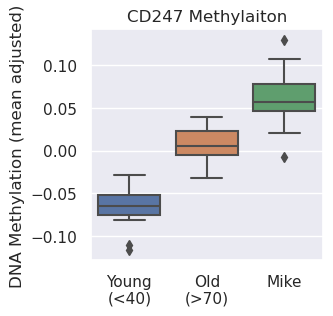

In [26]:
pl=dg[dg['pos']>167439600].head(17).drop('pos',axis=1)
pl=(pl.T-pl.T.mean()).T
pl.columns=['Young\n(<40)', 'Old\n(>70)','Mike']
sns.set(rc={'figure.figsize':(3,3)})
g=sns.boxplot(data=pl)
g.set(ylabel='DNA Methylation (mean adjusted)',title='CD247 Methylaiton')

In [27]:
ch='chr10'
t1=tom[tom['chr']==ch].drop('chr',axis=1).copy()
t1['pos']=t1['pos'].astype(int)
d1=df[df['chr']==ch].drop('chr',axis=1).copy()
d1=d1.dropna().copy()
d1['pos']=d1['pos'].astype(int)-1
dg=t1.merge(d1,on='pos',how='inner')

In [32]:
beg,end=100562244,100563087
pl=dg[(dg['pos']>=beg)&(dg['pos']<=end)].head(17).drop('pos',axis=1)
pl=(pl.T-pl.T.mean()).T
pl.columns=['Young\n(<40)', 'Old\n(>70)','Mike']

[Text(0, 0.5, 'DNA Methylation (mean adjusted)'),
 Text(0.5, 1.0, 'HIF1 Methylaiton')]

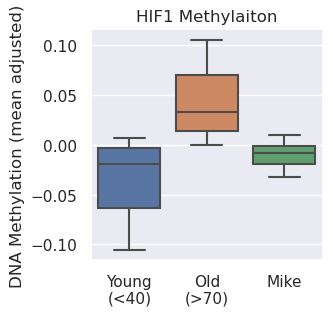

In [35]:
gene='HIF1'
sns.set(rc={'figure.figsize':(3,3)})
g=sns.boxplot(data=pl)
g.set(ylabel='DNA Methylation (mean adjusted)',title=gene+' Methylaiton')

In [42]:
man=pd.read_table('data/ref/HM450.hg38.manifest.tsv',usecols=['Probe_ID','CpG_chrm','CpG_beg'],index_col='Probe_ID')
man=man.dropna().copy()
man.columns=['chr','beg']
man['pos']=man['chr']+':'+(man['beg']+1).astype(int).astype(str)

In [47]:
%%time
dg=man.merge(df,left_on='pos',right_index=True,how='inner')

CPU times: user 27.2 s, sys: 780 ms, total: 28 s
Wall time: 27.5 s


In [84]:
%%time
from biolearn.data_library import DataLibrary
data_source = DataLibrary().get("GSE41169")
data=data_source.load()
m = data.dnam

CPU times: user 12.3 s, sys: 365 ms, total: 12.6 s
Wall time: 12.6 s


In [85]:
age=data.metadata['age']
age=age[age>=60]
age=age[age<=68]
ar=m[age.index].mean(1)

In [86]:
wg=dg[df.columns].mean(1)

<Axes: >

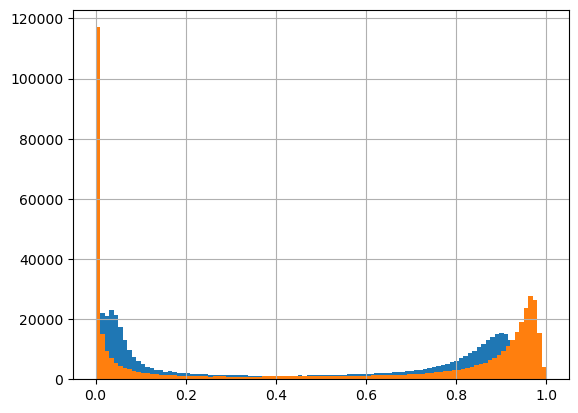

In [87]:
ar.hist(bins=100)
wg.hist(bins=100)